In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import akshare as ak
matplotlib.rc("font", family="PingFang HK")

from datetime import date, timedelta

#### 指数溢价率

In [2]:
HS300_dividend_ratio = pd.read_csv('沪深300_股息率_市值加权_10年_20220126_090402.csv')[['时间','股息率市值加权']].dropna().set_index('时间')[::-1]
Bond10return = pd.read_csv('宏观_中债_收益率_20220126_032810.csv').dropna().set_index('时间')[::-1]

HS300_dividend_ratio.index = pd.to_datetime(HS300_dividend_ratio.index)
Bond10return.index = pd.to_datetime(Bond10return.index)



dividend_premium_rate_df = HS300_dividend_ratio.join(Bond10return)
dividend_premium_rate_df['沪深300股息溢价'] = dividend_premium_rate_df['股息率市值加权'] - dividend_premium_rate_df['十年期收益率']
# dividend_premium_rate_df=dividend_premium_rate_df.reset_index()
dividend_premium_rate_df

,股息率市值加权,一年期收益率,三年期收益率,五年期收益率,十年期收益率,沪深300股息溢价
时间,,,,,,
2012-01-30,0.0238,0.027757,0.028858,0.030561,0.034005,-0.010205
2012-01-31,0.0237,0.027658,0.028893,0.030502,0.034064,-0.010364
2012-02-01,0.0240,0.027829,0.029075,0.031131,0.034318,-0.010318
2012-02-02,0.0235,0.027733,0.029059,0.031073,0.034410,-0.010910
2012-02-03,0.0234,0.027803,0.029058,0.031113,0.034360,-0.010960
...,...,...,...,...,...,...
2022-01-20,0.0215,0.020204,0.023038,0.024745,0.027271,-0.005771
2022-01-21,0.0217,0.020018,0.022614,0.024295,0.027100,-0.005400
2022-01-24,0.0216,0.019502,0.022188,0.023527,0.026751,-0.005151


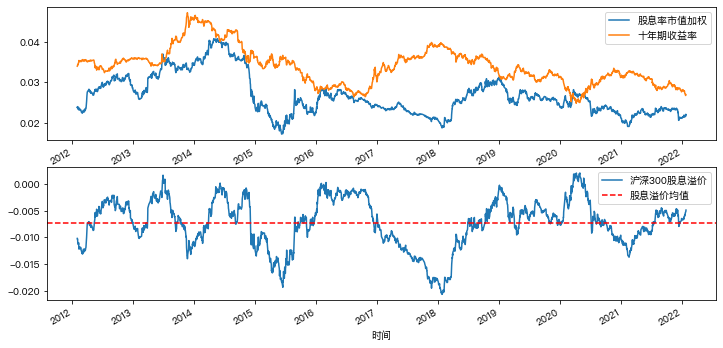

In [3]:
fig = plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
dividend_premium_rate_df['股息率市值加权'].plot()
dividend_premium_rate_df['十年期收益率'].plot()
plt.legend()
plt.subplot(2,1,2)
dividend_premium_rate_df['沪深300股息溢价'].plot()
plt.axhline(y=dividend_premium_rate_df['沪深300股息溢价'].mean(), color='r', linestyle='--', label='股息溢价均值')
plt.legend()

In [13]:
HS300_index = ak.stock_zh_index_daily(symbol="sh000300")[['close', 'volume']]
ZZ500_index = ak.stock_zh_index_daily(symbol="sh000905")[['close', 'volume']]
ZZ1000_index = ak.stock_zh_index_daily(symbol="sh000852")[['close', 'volume']]

HS300_index.rename(columns={'close':'沪深300指数'}, inplace=True)
ZZ500_index.rename(columns={'close':'中证500指数'}, inplace=True)
ZZ1000_index.rename(columns={'close':'中证1000指数'}, inplace=True)

In [18]:
comp_df = HS300_index.join(ZZ500_index['中证500指数']).join(ZZ1000_index['中证1000指数']).dropna()
comp_df['中证500/沪深300'] = comp_df['中证500指数']/comp_df['沪深300指数']
comp_df['中证1000/沪深300'] = comp_df['中证1000指数']/comp_df['沪深300指数']

comp_df

,沪深300指数,volume,中证500指数,中证1000指数,中证500/沪深300,中证1000/沪深300
date,,,,,,
2014-10-17 00:00:00+00:00,2441.732,1.327600e+10,4860.732,6058.668,1.990690,2.481299
2014-10-20 00:00:00+00:00,2454.711,9.143540e+09,4929.160,6154.520,2.008041,2.507228
2014-10-21 00:00:00+00:00,2433.391,9.624191e+09,4884.024,6103.008,2.007086,2.508026
2014-10-22 00:00:00+00:00,2418.641,8.865619e+09,4825.609,6027.510,1.995174,2.492106
2014-10-23 00:00:00+00:00,2395.936,1.034918e+10,4755.231,5930.483,1.984707,2.475226
...,...,...,...,...,...,...
2022-01-20 00:00:00+00:00,4823.509,1.649713e+10,7056.785,7492.610,1.462998,1.553353
2022-01-21 00:00:00+00:00,4779.314,1.389526e+10,6976.616,7388.744,1.459753,1.545984
2022-01-24 00:00:00+00:00,4786.738,1.144639e+10,6979.246,7425.402,1.458038,1.551245


Text(0.5, 1.0, '指数风格')

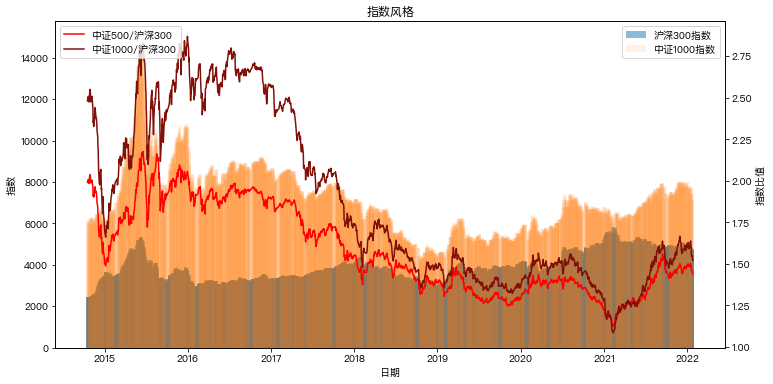

In [29]:
fig,ax = plt.subplots(figsize=(12,6))
ax.bar(comp_df.index, comp_df['沪深300指数'], width=15, label='沪深300指数', alpha=0.5)
ax.bar(comp_df.index, comp_df['中证1000指数'], width=15, label='中证1000指数', alpha=0.1)
ax.set_xlabel('日期')
ax.set_ylabel('指数')
ax.legend()
ax2 = ax.twinx()
ax2.plot(comp_df.index, comp_df['中证500/沪深300'], color='r', label='中证500/沪深300')
ax2.plot(comp_df.index, comp_df['中证1000/沪深300'], color='#821008', label='中证1000/沪深300')
ax2.set_ylabel('指数比值')
ax2.legend(loc=2)
ax.set_title('指数风格')

In [32]:
growth_index = ak.stock_zh_index_daily(symbol="sz399372")[['close', 'volume']]
value_index = ak.stock_zh_index_daily(symbol="sz399373")[['close', 'volume']]

growth_index.rename(columns={'close':'大盘成长'}, inplace=True)
value_index.rename(columns={'close':'大盘价值'}, inplace=True)

groth_value_df = growth_index.join(value_index['大盘价值'])
groth_value_df['大盘成长/大盘价值'] = groth_value_df['大盘成长']/groth_value_df['大盘价值']

groth_value_df

,大盘成长,volume,大盘价值,大盘成长/大盘价值
date,,,,
2010-01-07 00:00:00+00:00,3687.372,2.117033e+09,4673.646,0.788971
2010-01-08 00:00:00+00:00,3692.888,1.620831e+09,4683.236,0.788533
2010-01-11 00:00:00+00:00,3689.221,2.877134e+09,4677.926,0.788645
2010-01-12 00:00:00+00:00,3732.266,2.793942e+09,4735.098,0.788213
2010-01-13 00:00:00+00:00,3586.608,3.345498e+09,4531.597,0.791467
...,...,...,...,...
2022-01-20 00:00:00+00:00,6297.522,1.724396e+09,7796.937,0.807692
2022-01-21 00:00:00+00:00,6237.174,1.721524e+09,7726.985,0.807194
2022-01-24 00:00:00+00:00,6250.446,1.471822e+09,7730.832,0.808509


Text(0.5, 1.0, '指数风格')

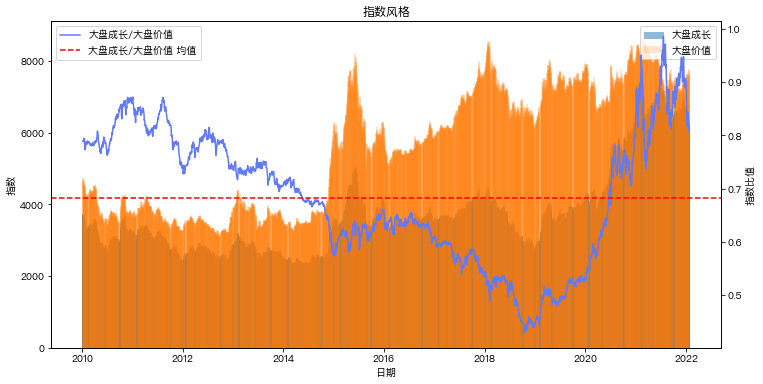

In [41]:
fig,ax = plt.subplots(figsize=(12,6))
ax.bar(groth_value_df.index, groth_value_df['大盘成长'], width=15, label='大盘成长', alpha=0.5)
ax.bar(groth_value_df.index, groth_value_df['大盘价值'], width=15, label='大盘价值', alpha=0.2)
ax.set_xlabel('日期')
ax.set_ylabel('指数')
ax.legend(loc=1)
ax2 = ax.twinx()
ax2.plot(groth_value_df.index, groth_value_df['大盘成长/大盘价值'], color='#627af5', label='大盘成长/大盘价值')
ax2.axhline(y=groth_value_df['大盘成长/大盘价值'].mean(), color='r', linestyle='--', label='大盘成长/大盘价值 均值')
ax2.set_ylabel('指数比值')
ax2.legend(loc=2)
ax.set_title('指数风格')

M1 和 M2（亿元）

In [74]:
macro_china_supply_of_money_df = ak.macro_china_supply_of_money().set_index('统计时间')
macro_china_supply_of_money_df.index = pd.to_datetime(macro_china_supply_of_money_df.index)
macro_china_supply_of_money_df = macro_china_supply_of_money_df.iloc[:,:5].dropna().astype(float)
macro_china_supply_of_money_df['M1 M2增速差（%）'] = macro_china_supply_of_money_df['货币(狭义货币M1)同比增长'] - macro_china_supply_of_money_df['货币和准货币（广义货币M2）同比增长']

stock_zh_index_daily_df = ak.stock_zh_index_daily(symbol="sh000001").reset_index()[['date', 'close']]
stock_zh_index_daily_df = stock_zh_index_daily_df.rename(columns={'date': '净值日期', 'close': '单位净值'})

def transto_monthlyindex(df):

    index_bar_df = pd.DataFrame()
    index_list = []
    df['year'] = pd.DatetimeIndex(df['净值日期']).year
    df['month'] = pd.DatetimeIndex(df['净值日期']).month
    year_list = df['year'].unique()

    for year in year_list:
        month_list = df[df['year'] == year]['month'].unique()
        for month in month_list:
            sub_df = df[(df['year'] == year) & (df['month'] == month)]
            timestamp = pd.to_datetime(str(year) + '-' + str(month))
            index_list.append((sub_df['单位净值'].values[-1]))
            index_bar_df[timestamp] = 0

    index_bar_df = index_bar_df.T
    index_bar_df['Value'] = index_list
    return index_bar_df

stock_zh_index_daily_df = transto_monthlyindex(stock_zh_index_daily_df)
macro_china_supply_of_money_df = macro_china_supply_of_money_df.join(stock_zh_index_daily_df)[::-1]


100%|██████████| 17/17 [00:07<00:00,  2.19it/s]
<ipython-input-74-a00a841cbfa7>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  index_bar_df[timestamp] = 0


In [104]:
macro_china_supply_of_money_df

,货币和准货币（广义货币M2）,货币和准货币（广义货币M2）同比增长,货币(狭义货币M1),货币(狭义货币M1)同比增长,流通中现金(M0),M1 M2增速差（%）,上证指数
统计时间,,,,,,,
1991-12-01,19349.90,26.50,8633.30,24.20,3177.80,-2.30,292.750
1992-12-01,25402.20,31.30,11731.50,35.90,4336.00,4.60,780.390
1993-12-01,34879.80,37.31,16280.40,38.78,5864.70,1.47,833.800
1994-12-01,46923.50,34.50,20540.70,26.20,7288.60,-8.30,647.870
1995-12-01,60750.50,29.50,23987.10,16.80,7885.30,-12.70,555.290
...,...,...,...,...,...,...,...
2021-08-01,2312267.68,8.20,626658.69,4.20,85059.20,-4.00,3543.940
2021-09-01,2342829.70,8.30,624645.68,3.70,86867.09,-4.60,3568.167
2021-10-01,2336160.48,8.70,626082.12,2.80,86085.78,-5.90,3547.336


Text(0.5, 1.0, 'M1 M2增速差（%）与上证指数月末收盘价')

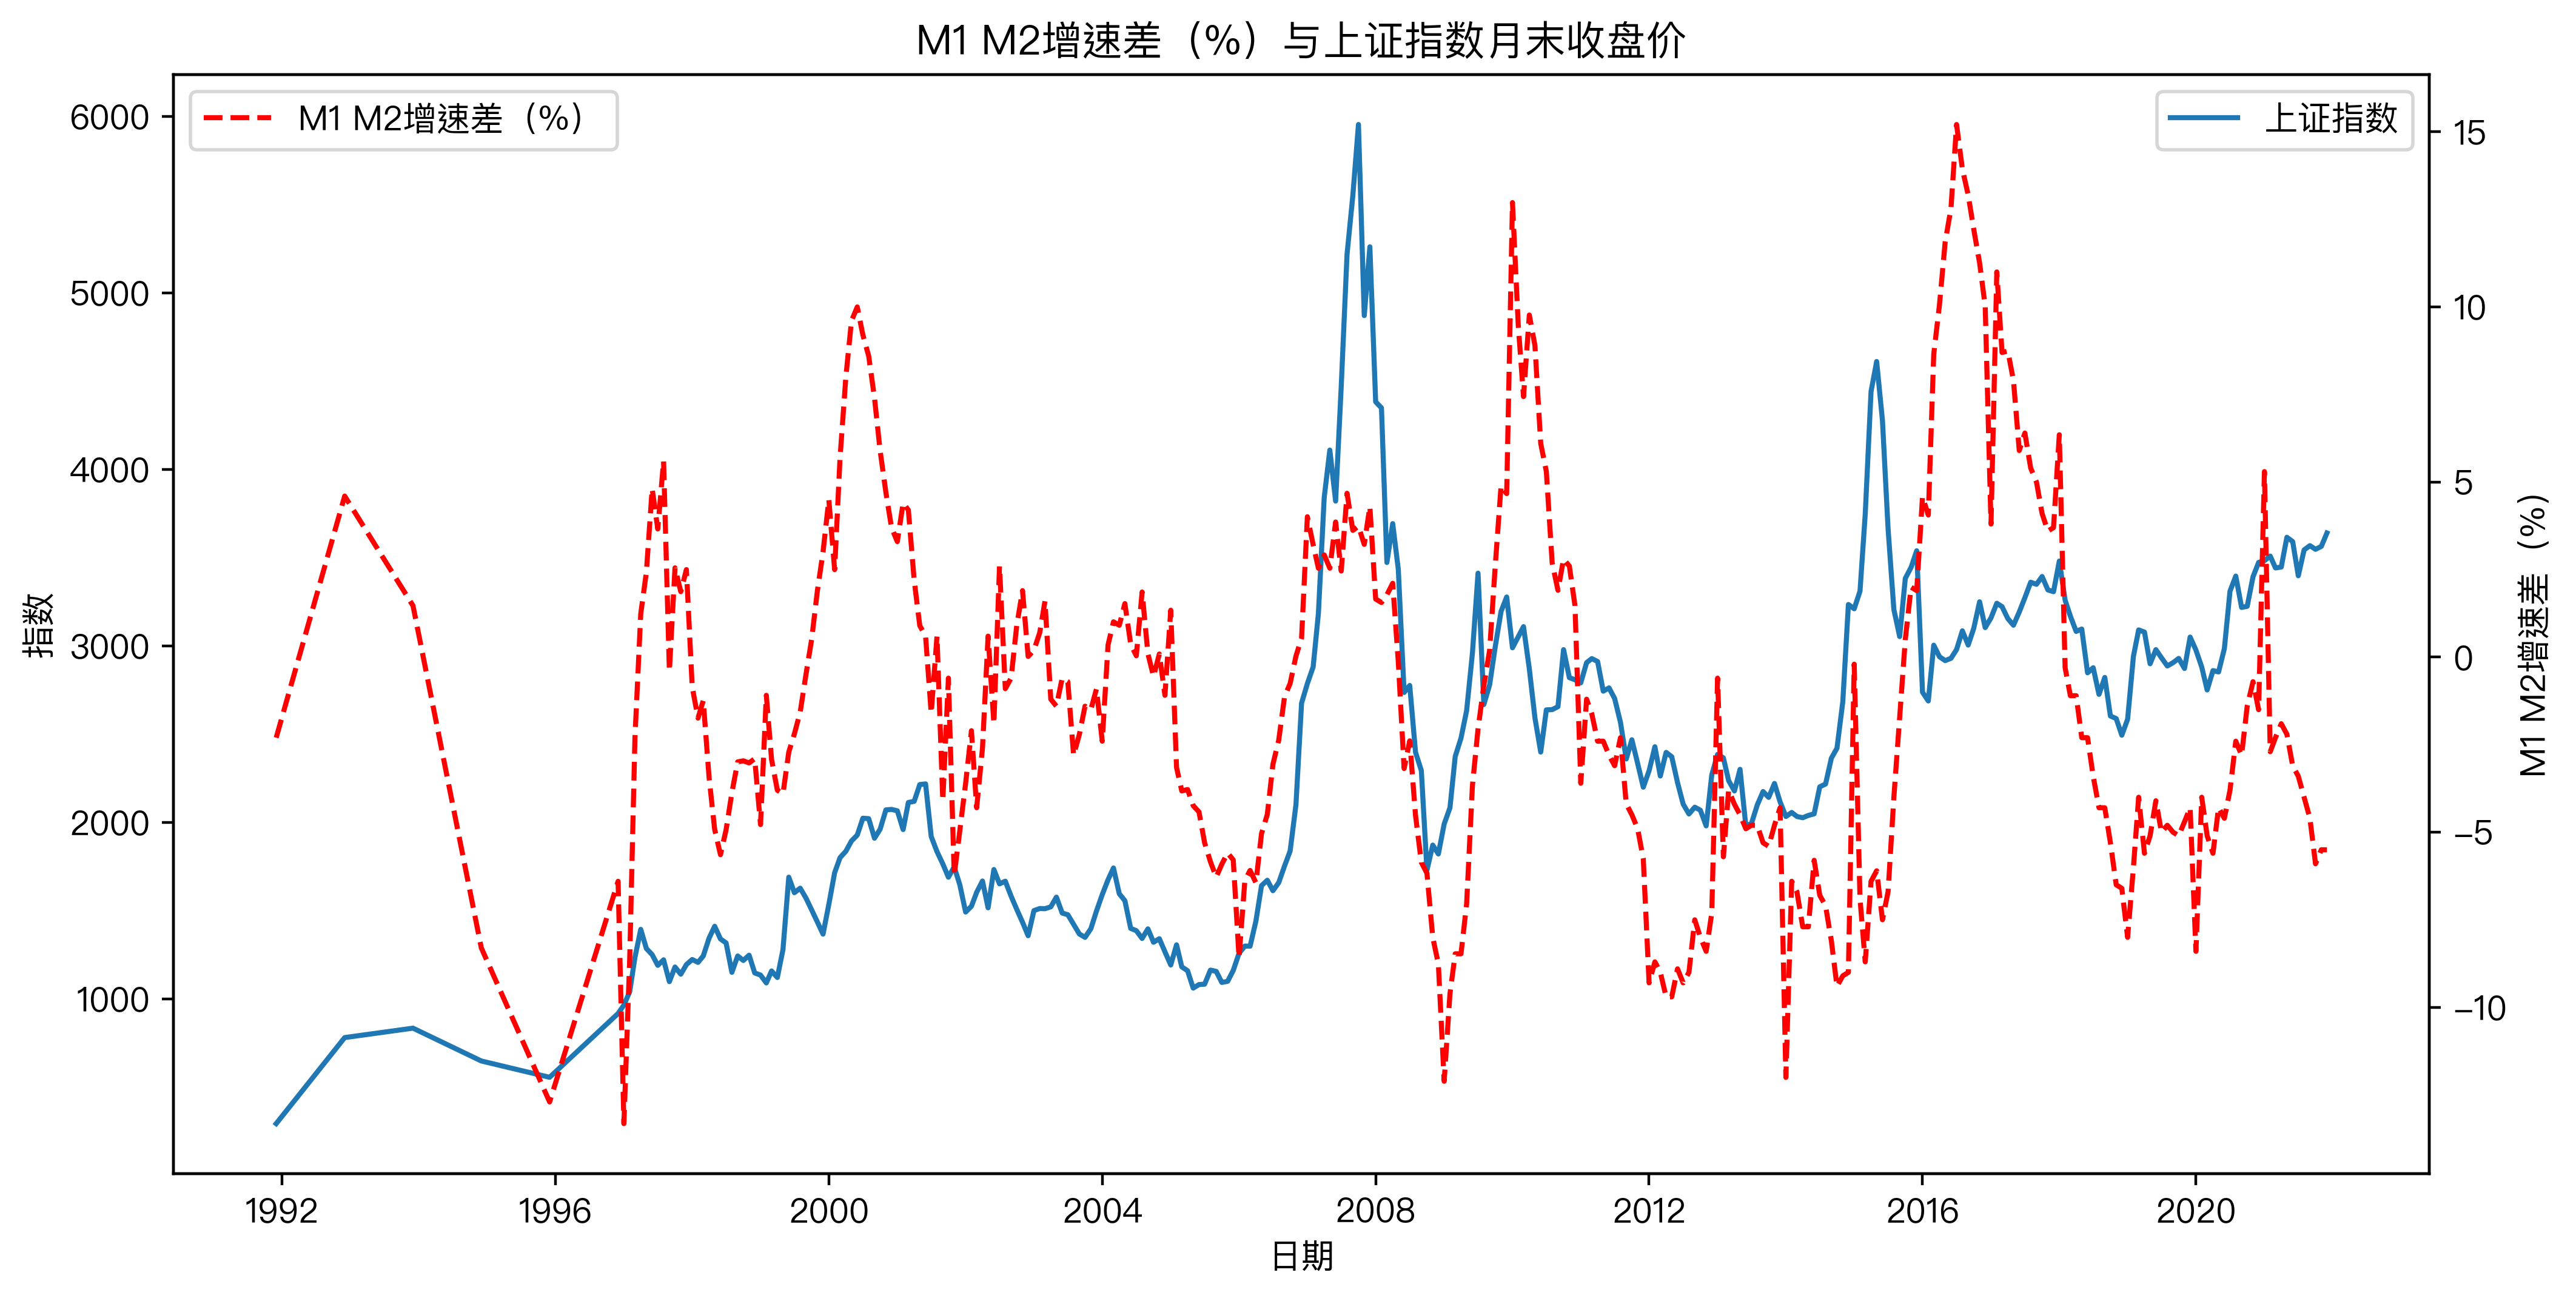

In [128]:
macro_china_supply_of_money_df = macro_china_supply_of_money_df.rename(columns={'Value': '上证指数'})

fig,ax = plt.subplots(figsize=(12,6), dpi=400)
ax.plot(macro_china_supply_of_money_df.index, macro_china_supply_of_money_df['上证指数'],label='上证指数')
ax.set_xlabel('日期')
ax.set_ylabel('指数')
ax.legend()
ax2 = ax.twinx()
ax2.plot(macro_china_supply_of_money_df.index, macro_china_supply_of_money_df['M1 M2增速差（%）'], 'r--', label='M1 M2增速差（%）')
ax2.set_ylabel('M1 M2增速差（%）')
ax2.legend(loc=2)
ax.set_title('M1 M2增速差（%）与上证指数月末收盘价')

In [112]:
macro_housing_df = pd.read_csv('商品房销售_20220130_142030.csv').dropna().rename(columns={'="商品房销售面积累计"':'商品房销售面积累计(亿平米)',
                                                                                        '="商品房销售额累计"': "商品房销售额累计",
                                                                                        '="商品房销售面积增长率"':"商品房销售面积增长率",
                                                                                        '="商品房销售额增长率"' : "商品房销售额增长率" 
                                                                                                   }).set_index('时间')[::-1]
macro_housing_df['year'] = pd.DatetimeIndex(macro_housing_df.index).year
macro_housing_df['month'] = pd.DatetimeIndex(macro_housing_df.index).month

macro_housing_df['日期'] = ''

for i in range(len(macro_housing_df)):
    macro_housing_df['日期'][i] = str(macro_housing_df['year'][i])+'-'+str(macro_housing_df['month'][i])

macro_housing_df['日期'] = pd.to_datetime(macro_housing_df['日期'])

macro_housing_df = macro_housing_df.set_index('日期')
macro_housing_df['商品房销售面积增长率'] = macro_housing_df['商品房销售面积增长率'] * 100
macro_housing_df['商品房销售额增长率'] = macro_housing_df['商品房销售额增长率'] * 100

macro_housing_df = macro_housing_df.join(macro_china_supply_of_money_df[['货币和准货币（广义货币M2）同比增长', '货币和准货币（广义货币M2）']])

macro_housing_df


,商品房销售面积累计(亿平米),商品房销售额累计,商品房销售面积增长率,商品房销售额增长率,year,month,货币和准货币（广义货币M2）同比增长,货币和准货币（广义货币M2）
日期,,,,,,,,
2002-02-01,9.237500e+06,2.228600e+10,5.2,0.2,2002,2,13.0,160935.59
2002-03-01,2.152660e+07,5.140300e+10,17.7,16.7,2002,3,14.4,164064.57
2002-04-01,3.379570e+07,7.797400e+10,20.7,19.3,2002,4,14.1,164570.56
2002-05-01,4.564600e+07,1.045490e+11,20.3,16.3,2002,5,14.0,166023.00
2002-06-01,6.279850e+07,1.445170e+11,22.5,22.4,2002,6,14.7,169601.24
...,...,...,...,...,...,...,...,...
2021-08-01,1.141928e+09,1.190469e+13,15.9,22.8,2021,8,8.2,2312267.68
2021-09-01,1.303318e+09,1.347949e+13,11.3,16.6,2021,9,8.3,2342829.70
2021-10-01,1.430407e+09,1.471847e+13,7.3,11.8,2021,10,8.7,2336160.48


社融

In [121]:
macro_china_shrzgm_df = ak.macro_china_shrzgm()[['月份', '社会融资规模增量']][::-1].rename(columns={'社会融资规模增量':'社会融资规模增量(亿元)'})
macro_china_shrzgm_df['日期'] = ''

for i in range(len(macro_china_shrzgm_df)):
    macro_china_shrzgm_df['日期'][i] = str(macro_china_shrzgm_df['月份'][i][0:4])+'-'+str(macro_china_shrzgm_df['月份'][i][4:])

macro_china_shrzgm_df.index = pd.to_datetime(macro_china_shrzgm_df['日期'])

macro_china_shrzgm_df = macro_china_shrzgm_df.join(macro_china_supply_of_money_df['货币和准货币（广义货币M2）同比增长'])
macro_china_shrzgm_df

,月份,社会融资规模增量(亿元),日期,货币和准货币（广义货币M2）同比增长
日期,,,,
2015-01-01,201501,20516,2015-01,10.8
2015-02-01,201502,13609,2015-02,12.5
2015-03-01,201503,12433,2015-03,11.6
2015-04-01,201504,10582,2015-04,10.1
2015-05-01,201505,12397,2015-05,10.8
...,...,...,...,...
2021-08-01,202108,29893,2021-08,8.2
2021-09-01,202109,29026,2021-09,8.3
2021-10-01,202110,16176,2021-10,8.7


Text(0.5, 1.0, '社融规模增量 M2增速')

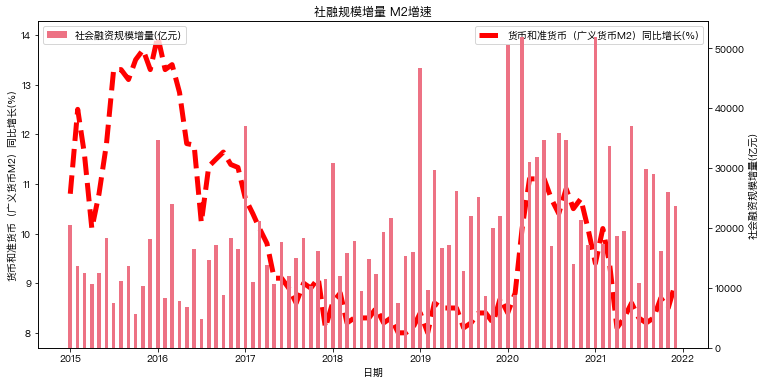

In [127]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(macro_china_shrzgm_df.index, macro_china_shrzgm_df['货币和准货币（广义货币M2）同比增长'],'r--', linewidth=5.0 ,label='货币和准货币（广义货币M2）同比增长(%)')
ax.set_xlabel('日期')
ax.set_ylabel('货币和准货币（广义货币M2）同比增长(%)')
ax.legend()
ax2 = ax.twinx()
ax2.bar(macro_china_shrzgm_df.index, macro_china_shrzgm_df['社会融资规模增量(亿元)'], width=15, color='#ed7284', label='社会融资规模增量(亿元)')
ax2.set_ylabel('社会融资规模增量(亿元)')
ax2.legend(loc=2)
ax.set_title('社融规模增量 M2增速')